### Task 4.10 - Part 1 continued_4

##### Table of Contents
Continuing insights

6.	Create an appropriate visualization to show the distribution of profiles.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Jay\Documents\Instacart Basket Analysis'

In [3]:
# import prepared data
df = pd.read_pickle(os.path.join(path, '02 Data Sets', 'Prepared Data', 'df_3.pkl'))

In [4]:
# import depaertments data
df_dep = pd.read_csv(os.path.join(path, '02 Data Sets', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [5]:
df_dep.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
# rename unnamed column
df_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [7]:
# verifying results
df_dep.dtypes

department_id     int64
department       object
dtype: object

In [8]:
df_dep.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
# converting object column to category for optimal memory usage
df_dep[['department']] = df_dep[['department']].astype('category')

In [10]:
df_dep.dtypes

department_id       int64
department       category
dtype: object

In [11]:
# Merge above dataframes
df_4 = df_dep.merge(df, on = 'department_id')

In [12]:
df_4.head()

,department_id,department,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,...,dependants,family_status,income,region,exclusion_flag,age_group,income_range,parental_status,weekday,day_section
0,1,frozen,738281,2,4,2,10,8.0,False,45613,...,3,married,64940,West,Frequent Customer,60-69,050000-69999,Parent,Monday,Mid-day
1,1,frozen,738281,2,4,2,10,8.0,False,9681,...,3,married,64940,West,Frequent Customer,60-69,050000-69999,Parent,Monday,Mid-day
2,1,frozen,738281,2,4,2,10,8.0,False,21150,...,3,married,64940,West,Frequent Customer,60-69,050000-69999,Parent,Monday,Mid-day
3,1,frozen,1199898,2,6,2,9,13.0,False,9681,...,3,married,64940,West,Frequent Customer,60-69,050000-69999,Parent,Monday,Morning
4,1,frozen,788338,2,8,1,15,27.0,False,2002,...,3,married,64940,West,Frequent Customer,60-69,050000-69999,Parent,Sunday,Afternoon


In [13]:
df_4.dtypes

department_id                int64
department                category
order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
new_customer                  bool
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name              category
aisle_id                   float64
prices                     float64
_merge                    category
price_range_loc           category
Busiest day               category
Busiest_days              category
busiest_period_of_day     category
max_order                    int64
loyalty_flag              category
spending                   float64
spending_flag             category
frequency                  float64
gender                    category
state                     category
age                          int64
date_joined         

###### Continuing insights

In [19]:
# crosstab of department & age_group variables
xtab_dep_age = pd.crosstab(df_4['department'], df_4['age_group'], dropna = False)

In [20]:
xtab_dep_age

age_group,18-29,30-39,40-49,50-59,60-69,70-79,80+
department,,,,,,,
alcohol,27938,23718,22437,22938,21505,22375,3716
babies,77758,63698,67072,63126,63052,63051,12635
bakery,210358,175644,176611,175769,172077,174878,35491
beverages,477655,396518,406669,407390,394285,408420,80964
breakfast,128115,103824,106309,104851,101498,104584,21669
bulk,6414,5210,5384,5019,5180,5068,1176
canned goods,192170,157546,158811,159100,156299,156542,31606
dairy eggs,976278,817025,819936,801431,789337,811449,161727
deli,188533,157312,158399,156255,155403,156408,31524


In [23]:
# crosstab of & department & income_range variables
xtab_dep_income = pd.crosstab(df_4['department'], df_4['income_range'], dropna = False)

In [24]:
xtab_dep_income

income_range,0-29999,030000-49999,050000-69999,070000-99999,100000-199999,200000-299999,300000-399999,400000-499999,500000+
department,,,,,,,,,
alcohol,1247,16800,21915,35523,63015,3312,1361,846,608
babies,1509,27731,65931,118517,194600,1407,300,120,277
bakery,6001,100756,185909,300451,515107,7727,2812,1266,799
beverages,23377,359744,421115,641203,1101801,15370,4842,2726,1723
breakfast,4801,86607,112783,169063,291067,4156,1299,657,417
bulk,333,4343,5591,8966,14191,22,1,1,3
canned goods,4190,74785,169555,278291,476164,5233,1998,1089,769
dairy eggs,28367,473996,861443,1407165,2361905,27658,8682,4570,3397
deli,6501,99947,167391,267896,454791,4503,1553,852,400


In [25]:
# Checking the department column 
df_4['department'].value_counts()

produce            9079276
dairy eggs         5177183
snacks             2766406
beverages          2571901
frozen             2121732
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699858
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [26]:
df_4.shape

(30964570, 39)

6.	Create an appropriate visualization to show the distribution of profiles.

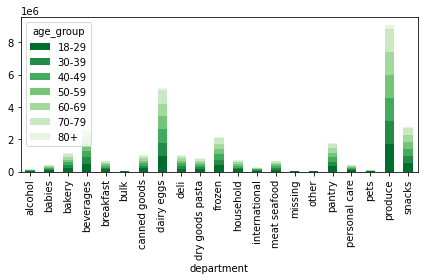

In [75]:
bar_dept_age = xtab_dep_age.plot.bar(stacked = True, color = sns.color_palette('Greens_r', 7))
plt.legend(title = 'age_group',loc='upper left')
plt.tight_layout()

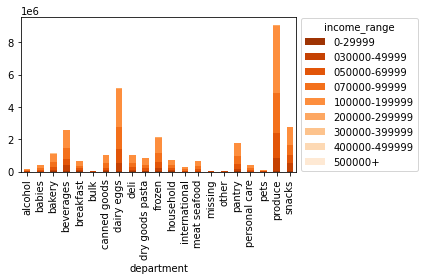

In [46]:
bar_dep_income = xtab_dep_income.plot.bar(stacked = True, color = sns.color_palette('Oranges_r', 9))
plt.legend(title = 'income_range',loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [59]:
xtab_busypod_age = pd.crosstab(df_4['day_section'], df_4['age_group'], dropna = False)

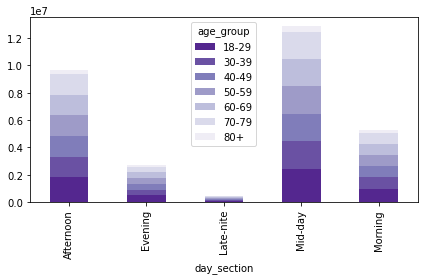

In [73]:
bar_busypod_age = xtab_busypod_age.plot.bar(stacked = True, color = sns.color_palette('Purples_r', 7))
plt.legend(title = 'age_group',loc='upper center')
plt.tight_layout()

In [50]:
# crosstab of weekday & income_range variables
xtab_income_day = pd.crosstab(df_4['income_range'], df_4['weekday'], dropna = False)

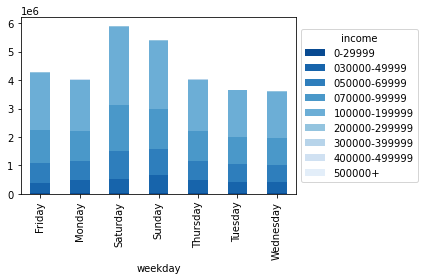

In [55]:
bar_day_income = xtab_day_income.plot.bar(stacked = True, color = sns.color_palette('Blues_r', 9))
plt.legend(title = 'income',loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [57]:
# crosstab of department and family_status
xtab_dep_fam = pd.crosstab(df_4['department'], df_4['family_status'], dropna = False)

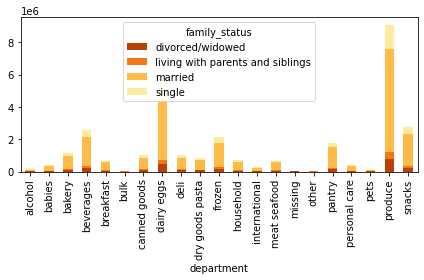

In [72]:
bar_dep_fam = xtab_dep_fam.plot.bar(stacked = True, color = sns.color_palette('YlOrBr_r', 4))
plt.legend(title = 'family_status', loc='upper center')
plt.tight_layout()

In [76]:
# crosstab of department & parental_status
xtab_dep_parent = pd.crosstab(df_4['department'], df_4['parental_status'], dropna = False)

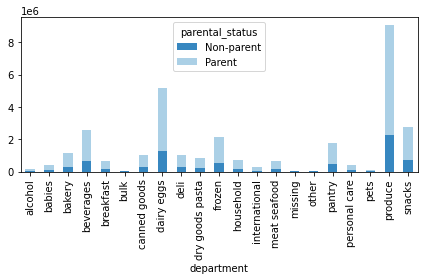

In [79]:
bar_dep_parent = xtab_dep_parent.plot.bar(stacked = True, color = sns.color_palette('Blues_r', 2))
plt.legend(title = 'parental_status', loc='upper center')
plt.tight_layout()

In [81]:
# export "bar_busypod_age" Bar Chart
bar_busypod_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_busypod_age.png'))

In [82]:
# export "bar_dept_age" Bar Chart
bar_dept_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dept_age.png'))

In [83]:
# export "bar_dep_income" Bar Chart
bar_dep_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dep_income.png'))

In [84]:
# export "bar_day_income" Bar Chart
bar_day_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_day_income.png'))

In [85]:
# export "bar_dep_fam" Bar Chart
bar_dep_fam.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dep_fam.png'))

In [86]:
# export "bar_dep_parent" Bar Chart
bar_dep_parent.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dep_parent.png'))

In [87]:
# Export data to pkl
df_4.to_pickle(os.path.join(path, '02 Data Sets','Prepared Data', 'df_4.pkl'))